In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)

import random
import ruptures as rpt

In [2]:
def print_decision_rules(rf):

    for tree_idx, est in enumerate(rf.estimators_):
        tree = est.tree_
        assert tree.value.shape[1] == 1 # no support for multi-output

        print('TREE: {}'.format(tree_idx))

        iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
        for node_idx, data in iterator:
            left, right, feature, th, value = data

            # left: index of left child (if any)
            # right: index of right child (if any)
            # feature: index of the feature to check
            # th: the threshold to compare against
            # value: values associated with classes

            # for classifier, value is 0 except the index of the class to return
            class_idx = np.argmax(value[0])

            if left == -1 and right == -1:
                print('{} LEAF: return class={}'.format(node_idx, class_idx))
            else:
                print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, rf.feature_names_in_[feature], th, left, right))

In [3]:
def statistical_features(arr):
    vmin = np.amin(arr)
    vmax = np.amax(arr)
    mean = np.mean(arr)
    std = np.std(arr)
    return vmin, vmax, mean, std

def shape_features(arr):
    skewness = skew(arr)
    kurt = kurtosis(arr)
    return skewness, kurt

In [4]:
df_lag = pd.read_csv("C:/Users/milena/Documents/tcc/dataset/combinedlagEDA.csv")
train_set = df_lag.iloc[:,0:48]
labels = df_lag.iloc[:,48:49]

In [5]:
#Create a random forest Classifier
clf = RandomForestClassifier(n_estimators=100,max_depth=15)

# Split our data
train, test, train_labels, test_labels = train_test_split(train_set, labels, test_size=0.33, random_state=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train, train_labels.values.ravel())

y_pred = clf.predict(test)

In [6]:
f1score   = f1_score        (test_labels, y_pred, average = 'macro')
recall    = recall_score    (test_labels, y_pred, average = 'macro')
precision = precision_score (test_labels, y_pred, average = 'macro')
accuracy  = accuracy_score  (test_labels, y_pred)

print('acc =', accuracy)
print('pre =', precision)
print('recall =', recall) 
print('f1 =', f1score)

acc = 0.952763574385196
pre = 0.9526158014887676
recall = 0.9349859481109762
f1 = 0.9427038882628351


<BarContainer object of 48 artists>

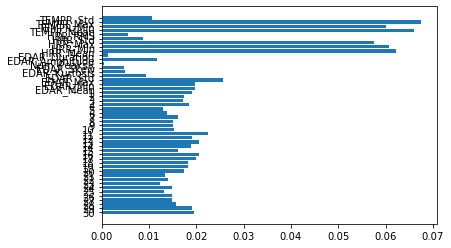

In [7]:
# feature imporance:
plt.barh(list(df_lag.columns.values[0:48]), clf.feature_importances_)

In [8]:
# decision rules
print_decision_rules(clf)

TREE: 0
0 NODE: if feature[11] < 0.20583489537239075 then next=1 else next=446
1 NODE: if feature[18] < 0.10367536544799805 then next=2 else next=43
2 NODE: if feature[TEMPR_Max] < 0.364436611533165 then next=3 else next=26
3 NODE: if feature[12] < 0.07406778633594513 then next=4 else next=5
4 LEAF: return class=0
5 NODE: if feature[HRR_Min] < 0.6802167892456055 then next=6 else next=25
6 NODE: if feature[16] < 0.08467012643814087 then next=7 else next=12
7 NODE: if feature[29] < 0.12924496829509735 then next=8 else next=9
8 LEAF: return class=2
9 NODE: if feature[3] < 0.09776913374662399 then next=10 else next=11
10 LEAF: return class=1
11 LEAF: return class=0
12 NODE: if feature[HRR_Mean] < 0.6292986869812012 then next=13 else next=22
13 NODE: if feature[EDAR_Std] < 0.33877988159656525 then next=14 else next=21
14 NODE: if feature[HRR_Max] < 0.5202702581882477 then next=15 else next=20
15 NODE: if feature[27] < 0.09808333963155746 then next=16 else next=19
16 NODE: if feature[14] < 0

743 NODE: if feature[EDAR_Skew] < 0.34129293262958527 then next=744 else next=745
744 LEAF: return class=0
745 LEAF: return class=2
746 LEAF: return class=2
747 NODE: if feature[EDAR_Min] < 0.2585838735103607 then next=748 else next=749
748 LEAF: return class=0
749 LEAF: return class=1
750 NODE: if feature[TEMPR_Mean] < 0.4668484032154083 then next=751 else next=752
751 LEAF: return class=2
752 LEAF: return class=0
753 NODE: if feature[28] < 0.18724577128887177 then next=754 else next=755
754 LEAF: return class=2
755 LEAF: return class=0
756 NODE: if feature[28] < 0.20513005554676056 then next=757 else next=764
757 NODE: if feature[19] < 0.204319067299366 then next=758 else next=759
758 LEAF: return class=0
759 NODE: if feature[TEMPR_Min] < 0.21238938719034195 then next=760 else next=763
760 NODE: if feature[12] < 0.22544731944799423 then next=761 else next=762
761 LEAF: return class=1
762 LEAF: return class=2
763 LEAF: return class=0
764 NODE: if feature[5] < 0.28310418128967285 then 

341 NODE: if feature[11] < 0.17039326578378677 then next=342 else next=343
342 LEAF: return class=1
343 LEAF: return class=0
344 NODE: if feature[3] < 0.18261758983135223 then next=345 else next=346
345 LEAF: return class=0
346 NODE: if feature[TEMPR_Min] < 0.5840708166360855 then next=347 else next=348
347 LEAF: return class=2
348 LEAF: return class=1
349 NODE: if feature[TEMPR_Mean] < 0.6107105314731598 then next=350 else next=481
350 NODE: if feature[5] < 0.2192353680729866 then next=351 else next=414
351 NODE: if feature[18] < 0.18730521202087402 then next=352 else next=391
352 NODE: if feature[30] < 0.2214985117316246 then next=353 else next=388
353 NODE: if feature[TEMPR_Min] < 0.49380530416965485 then next=354 else next=379
354 NODE: if feature[HRR_Min] < 0.7615176141262054 then next=355 else next=370
355 NODE: if feature[22] < 0.1167319156229496 then next=356 else next=357
356 LEAF: return class=0
357 NODE: if feature[TEMPR_Mean] < 0.42749735713005066 then next=358 else next=36

1080 NODE: if feature[TEMPR_Max] < 0.5545774698257446 then next=1081 else next=1082
1081 LEAF: return class=2
1082 LEAF: return class=0
1083 NODE: if feature[EDAR_Amphitude] < 0.03680087998509407 then next=1084 else next=1233
1084 NODE: if feature[8] < 0.3666236400604248 then next=1085 else next=1192
1085 NODE: if feature[18] < 0.21158402413129807 then next=1086 else next=1093
1086 NODE: if feature[TEMPR_Max] < 0.6047534942626953 then next=1087 else next=1092
1087 NODE: if feature[TEMPR_Min] < 0.5929203629493713 then next=1088 else next=1091
1088 NODE: if feature[HRR_Mean] < 0.724275678396225 then next=1089 else next=1090
1089 LEAF: return class=2
1090 LEAF: return class=0
1091 LEAF: return class=1
1092 LEAF: return class=0
1093 NODE: if feature[TEMPR_Min] < 0.7044247686862946 then next=1094 else next=1189
1094 NODE: if feature[EDAR_Max] < 0.22290536016225815 then next=1095 else next=1120
1095 NODE: if feature[18] < 0.26819635927677155 then next=1096 else next=1107
1096 NODE: if featur

518 LEAF: return class=2
519 LEAF: return class=0
520 NODE: if feature[TEMPR_Min] < 0.6451327204704285 then next=521 else next=610
521 NODE: if feature[HRR_Mean] < 0.2928513437509537 then next=522 else next=577
522 NODE: if feature[TEMPR_Max] < 0.4102112650871277 then next=523 else next=540
523 NODE: if feature[19] < 0.22650882601737976 then next=524 else next=529
524 NODE: if feature[26] < 0.2017204910516739 then next=525 else next=528
525 NODE: if feature[3] < 0.18232461810112 then next=526 else next=527
526 LEAF: return class=0
527 LEAF: return class=2
528 LEAF: return class=2
529 NODE: if feature[EDAR_Mean] < 0.20645906031131744 then next=530 else next=537
530 NODE: if feature[TEMPR_Min] < 0.27964600920677185 then next=531 else next=532
531 LEAF: return class=0
532 NODE: if feature[3] < 0.14363477379083633 then next=533 else next=534
533 LEAF: return class=1
534 NODE: if feature[HRR_Max] < 0.22297297418117523 then next=535 else next=536
535 LEAF: return class=2
536 LEAF: return cla

1262 LEAF: return class=0
1263 LEAF: return class=2
1264 NODE: if feature[14] < 0.278340145945549 then next=1265 else next=1266
1265 LEAF: return class=0
1266 LEAF: return class=2
1267 NODE: if feature[29] < 0.242134228348732 then next=1268 else next=1269
1268 LEAF: return class=0
1269 NODE: if feature[12] < 0.34298598766326904 then next=1270 else next=1277
1270 NODE: if feature[9] < 0.275677889585495 then next=1271 else next=1272
1271 LEAF: return class=1
1272 NODE: if feature[3] < 0.2749518156051636 then next=1273 else next=1276
1273 NODE: if feature[23] < 0.2783910930156708 then next=1274 else next=1275
1274 LEAF: return class=2
1275 LEAF: return class=1
1276 LEAF: return class=2
1277 NODE: if feature[18] < 0.3039352148771286 then next=1278 else next=1279
1278 LEAF: return class=2
1279 LEAF: return class=1
1280 NODE: if feature[19] < 0.346798911690712 then next=1281 else next=1286
1281 NODE: if feature[EDAR_Amphitude] < 0.019017870537936687 then next=1282 else next=1285
1282 NODE: i

530 NODE: if feature[14] < 0.23270803689956665 then next=531 else next=540
531 NODE: if feature[9] < 0.23456355184316635 then next=532 else next=537
532 NODE: if feature[TEMPR_Min] < 0.37168142199516296 then next=533 else next=536
533 NODE: if feature[4] < 0.24103450030088425 then next=534 else next=535
534 LEAF: return class=1
535 LEAF: return class=0
536 LEAF: return class=0
537 NODE: if feature[TEMPR_Mean] < 0.44037987291812897 then next=538 else next=539
538 LEAF: return class=2
539 LEAF: return class=1
540 LEAF: return class=2
541 NODE: if feature[12] < 0.2065906897187233 then next=542 else next=555
542 NODE: if feature[15] < 0.18947068601846695 then next=543 else next=552
543 NODE: if feature[EDAR_Amphitude] < 0.01811229158192873 then next=544 else next=549
544 NODE: if feature[EDAR_Skew] < 0.5617983341217041 then next=545 else next=548
545 NODE: if feature[HRR_RMS] < 0.07486093044281006 then next=546 else next=547
546 LEAF: return class=1
547 LEAF: return class=2
548 LEAF: retur

114 LEAF: return class=0
115 LEAF: return class=1
116 NODE: if feature[TEMPR_Min] < 0.270796462893486 then next=117 else next=122
117 NODE: if feature[14] < 0.12569953501224518 then next=118 else next=119
118 LEAF: return class=1
119 NODE: if feature[1] < 0.19006938487291336 then next=120 else next=121
120 LEAF: return class=2
121 LEAF: return class=1
122 LEAF: return class=1
123 NODE: if feature[TEMPR_Mean] < 0.27233555912971497 then next=124 else next=127
124 NODE: if feature[15] < 0.14461985230445862 then next=125 else next=126
125 LEAF: return class=0
126 LEAF: return class=2
127 LEAF: return class=1
128 NODE: if feature[24] < 0.10729298740625381 then next=129 else next=140
129 NODE: if feature[23] < 0.07566004619002342 then next=130 else next=131
130 LEAF: return class=0
131 NODE: if feature[TEMPR_Mean] < 0.4014245420694351 then next=132 else next=135
132 NODE: if feature[26] < 0.10320405662059784 then next=133 else next=134
133 LEAF: return class=2
134 LEAF: return class=1
135 NO

878 LEAF: return class=0
879 NODE: if feature[TEMPR_Min] < 0.18938053399324417 then next=880 else next=911
880 NODE: if feature[TEMPR_Mean] < 0.16171298176050186 then next=881 else next=896
881 NODE: if feature[20] < 0.33931316435337067 then next=882 else next=895
882 NODE: if feature[6] < 0.21937549114227295 then next=883 else next=884
883 LEAF: return class=0
884 NODE: if feature[18] < 0.2250269651412964 then next=885 else next=886
885 LEAF: return class=1
886 NODE: if feature[13] < 0.3665854334831238 then next=887 else next=894
887 NODE: if feature[EDAR_Std] < 0.05870664119720459 then next=888 else next=889
888 LEAF: return class=2
889 NODE: if feature[EDAR_Mean] < 0.26098235696554184 then next=890 else next=893
890 NODE: if feature[EDAR_Mean] < 0.20402184128761292 then next=891 else next=892
891 LEAF: return class=2
892 LEAF: return class=0
893 LEAF: return class=2
894 LEAF: return class=0
895 LEAF: return class=0
896 NODE: if feature[10] < 0.23500938713550568 then next=897 else ne

1161 NODE: if feature[HRR_Max] < 0.6891891956329346 then next=1162 else next=1165
1162 NODE: if feature[28] < 0.3014003336429596 then next=1163 else next=1164
1163 LEAF: return class=2
1164 LEAF: return class=2
1165 NODE: if feature[EDAR_Kurtosis] < 0.25568485260009766 then next=1166 else next=1167
1166 LEAF: return class=1
1167 LEAF: return class=2
1168 NODE: if feature[EDAR_Max] < 0.2633989155292511 then next=1169 else next=1170
1169 LEAF: return class=2
1170 NODE: if feature[3] < 0.2824672907590866 then next=1171 else next=1174
1171 NODE: if feature[23] < 0.2964664548635483 then next=1172 else next=1173
1172 LEAF: return class=2
1173 LEAF: return class=1
1174 NODE: if feature[12] < 0.2746800631284714 then next=1175 else next=1176
1175 LEAF: return class=1
1176 NODE: if feature[6] < 0.2865647077560425 then next=1177 else next=1178
1177 LEAF: return class=1
1178 LEAF: return class=2
1179 NODE: if feature[13] < 0.26744481921195984 then next=1180 else next=1181
1180 LEAF: return class=1

699 LEAF: return class=1
700 LEAF: return class=2
701 LEAF: return class=2
702 NODE: if feature[25] < 0.2531484290957451 then next=703 else next=714
703 NODE: if feature[11] < 0.33860407769680023 then next=704 else next=713
704 NODE: if feature[EDAR_Min] < 0.2837803214788437 then next=705 else next=708
705 NODE: if feature[EDAR_Amphitude] < 0.01959423068910837 then next=706 else next=707
706 LEAF: return class=2
707 LEAF: return class=0
708 NODE: if feature[27] < 0.20496870577335358 then next=709 else next=712
709 NODE: if feature[8] < 0.3919384777545929 then next=710 else next=711
710 LEAF: return class=1
711 LEAF: return class=2
712 LEAF: return class=2
713 LEAF: return class=2
714 LEAF: return class=0
715 NODE: if feature[7] < 0.24668597429990768 then next=716 else next=745
716 NODE: if feature[HRR_Max] < 0.35540540516376495 then next=717 else next=718
717 LEAF: return class=2
718 NODE: if feature[18] < 0.21286208182573318 then next=719 else next=732
719 NODE: if feature[22] < 0.166

150 LEAF: return class=0
151 NODE: if feature[HRR_Mean] < 0.30171946436166763 then next=152 else next=153
152 LEAF: return class=0
153 NODE: if feature[HRR_Max] < 0.6040540337562561 then next=154 else next=167
154 NODE: if feature[23] < 0.10659239068627357 then next=155 else next=156
155 LEAF: return class=2
156 NODE: if feature[EDAR_Mean] < 0.1536341831088066 then next=157 else next=162
157 NODE: if feature[EDAR_Skew] < 0.6085343956947327 then next=158 else next=159
158 LEAF: return class=1
159 NODE: if feature[8] < 0.15735794603824615 then next=160 else next=161
160 LEAF: return class=1
161 LEAF: return class=2
162 NODE: if feature[7] < 0.18358568847179413 then next=163 else next=166
163 NODE: if feature[9] < 0.13944818824529648 then next=164 else next=165
164 LEAF: return class=1
165 LEAF: return class=2
166 LEAF: return class=1
167 NODE: if feature[29] < 0.15190604329109192 then next=168 else next=175
168 NODE: if feature[22] < 0.1311047375202179 then next=169 else next=172
169 NOD

1164 LEAF: return class=1
1165 LEAF: return class=2
1166 NODE: if feature[4] < 0.32050323486328125 then next=1167 else next=1186
1167 NODE: if feature[HRR_Max] < 0.34324324131011963 then next=1168 else next=1175
1168 NODE: if feature[18] < 0.29533275961875916 then next=1169 else next=1174
1169 NODE: if feature[13] < 0.30062755942344666 then next=1170 else next=1173
1170 NODE: if feature[EDAR_Mean] < 0.2931290715932846 then next=1171 else next=1172
1171 LEAF: return class=2
1172 LEAF: return class=0
1173 LEAF: return class=1
1174 LEAF: return class=2
1175 NODE: if feature[EDAR_Min] < 0.3023146539926529 then next=1176 else next=1183
1176 NODE: if feature[TEMPR_Max] < 0.6663732528686523 then next=1177 else next=1182
1177 NODE: if feature[EDAR_Amphitude] < 0.05243116803467274 then next=1178 else next=1181
1178 NODE: if feature[1] < 0.23053406924009323 then next=1179 else next=1180
1179 LEAF: return class=0
1180 LEAF: return class=2
1181 LEAF: return class=1
1182 LEAF: return class=0
1183 N

699 NODE: if feature[14] < 0.2373829185962677 then next=700 else next=705
700 NODE: if feature[19] < 0.21991049498319626 then next=701 else next=702
701 LEAF: return class=2
702 NODE: if feature[HRR_Min] < 0.6341463327407837 then next=703 else next=704
703 LEAF: return class=2
704 LEAF: return class=0
705 NODE: if feature[4] < 0.28197474777698517 then next=706 else next=707
706 LEAF: return class=1
707 NODE: if feature[HRR_RMS] < 0.14527243375778198 then next=708 else next=709
708 LEAF: return class=2
709 LEAF: return class=0
710 NODE: if feature[20] < 0.2193245366215706 then next=711 else next=712
711 LEAF: return class=0
712 NODE: if feature[TEMPR_Mean] < 0.17129792273044586 then next=713 else next=716
713 NODE: if feature[TEMPR_Std] < 0.06754378601908684 then next=714 else next=715
714 LEAF: return class=2
715 LEAF: return class=1
716 NODE: if feature[20] < 0.24215970188379288 then next=717 else next=718
717 LEAF: return class=0
718 LEAF: return class=2
719 NODE: if feature[8] < 0.2

795 NODE: if feature[24] < 0.16702616214752197 then next=796 else next=801
796 NODE: if feature[4] < 0.28343963623046875 then next=797 else next=798
797 LEAF: return class=0
798 NODE: if feature[13] < 0.21494688093662262 then next=799 else next=800
799 LEAF: return class=2
800 LEAF: return class=1
801 NODE: if feature[HRR_RMS] < 0.1756332963705063 then next=802 else next=805
802 NODE: if feature[25] < 0.19119033217430115 then next=803 else next=804
803 LEAF: return class=2
804 LEAF: return class=1
805 LEAF: return class=2
806 NODE: if feature[12] < 0.3127075284719467 then next=807 else next=808
807 LEAF: return class=0
808 NODE: if feature[HRR_Min] < 0.23170731961727142 then next=809 else next=812
809 NODE: if feature[9] < 0.41928717494010925 then next=810 else next=811
810 LEAF: return class=0
811 LEAF: return class=2
812 NODE: if feature[28] < 0.1765330284833908 then next=813 else next=814
813 LEAF: return class=1
814 NODE: if feature[TEMPR_Std] < 0.08134964853525162 then next=815 el

102 NODE: if feature[24] < 0.15191877633333206 then next=103 else next=124
103 NODE: if feature[21] < 0.1321195289492607 then next=104 else next=117
104 NODE: if feature[HRR_Mean] < 0.6398930549621582 then next=105 else next=116
105 NODE: if feature[TEMPR_Std] < 0.09233061969280243 then next=106 else next=111
106 NODE: if feature[17] < 0.1315293312072754 then next=107 else next=108
107 LEAF: return class=1
108 NODE: if feature[17] < 0.13352496922016144 then next=109 else next=110
109 LEAF: return class=0
110 LEAF: return class=1
111 NODE: if feature[HRR_Min] < 0.5691056847572327 then next=112 else next=115
112 NODE: if feature[HRR_Mean] < 0.5485377907752991 then next=113 else next=114
113 LEAF: return class=1
114 LEAF: return class=2
115 LEAF: return class=1
116 LEAF: return class=0
117 NODE: if feature[EDAR_Min] < 0.12824564427137375 then next=118 else next=119
118 LEAF: return class=1
119 NODE: if feature[16] < 0.15734945237636566 then next=120 else next=121
120 LEAF: return class=0


1052 NODE: if feature[HRR_Min] < 0.18021679669618607 then next=1053 else next=1054
1053 LEAF: return class=2
1054 NODE: if feature[TEMPR_Std] < 0.04622963070869446 then next=1055 else next=1056
1055 LEAF: return class=2
1056 NODE: if feature[HRR_Max] < 0.21891891956329346 then next=1057 else next=1058
1057 LEAF: return class=0
1058 LEAF: return class=2
1059 NODE: if feature[HRR_Mean] < 0.17445167154073715 then next=1060 else next=1063
1060 NODE: if feature[14] < 0.32125478982925415 then next=1061 else next=1062
1061 LEAF: return class=2
1062 LEAF: return class=1
1063 NODE: if feature[EDAR_Max] < 0.19042571634054184 then next=1064 else next=1065
1064 LEAF: return class=2
1065 NODE: if feature[EDAR_Max] < 0.29621778428554535 then next=1066 else next=1067
1066 LEAF: return class=0
1067 NODE: if feature[14] < 0.29622018337249756 then next=1068 else next=1069
1068 LEAF: return class=1
1069 LEAF: return class=0
1070 NODE: if feature[TEMPR_Max] < 0.6426056325435638 then next=1071 else next=11

663 LEAF: return class=0
664 LEAF: return class=2
665 LEAF: return class=0
666 NODE: if feature[HRR_Min] < 0.6178861856460571 then next=667 else next=700
667 NODE: if feature[8] < 0.23544247448444366 then next=668 else next=677
668 NODE: if feature[1] < 0.25974252820014954 then next=669 else next=676
669 NODE: if feature[9] < 0.17112357914447784 then next=670 else next=671
670 LEAF: return class=1
671 NODE: if feature[11] < 0.24256307631731033 then next=672 else next=675
672 NODE: if feature[25] < 0.23948045819997787 then next=673 else next=674
673 LEAF: return class=2
674 LEAF: return class=2
675 LEAF: return class=1
676 LEAF: return class=1
677 NODE: if feature[HRR_Std] < 0.06311973556876183 then next=678 else next=691
678 NODE: if feature[26] < 0.26352573931217194 then next=679 else next=684
679 NODE: if feature[8] < 0.2393275946378708 then next=680 else next=681
680 LEAF: return class=1
681 NODE: if feature[5] < 0.28396613895893097 then next=682 else next=683
682 LEAF: return class

1233 NODE: if feature[EDAR_Mean] < 0.30894553661346436 then next=1234 else next=1237
1234 NODE: if feature[15] < 0.31278394162654877 then next=1235 else next=1236
1235 LEAF: return class=2
1236 LEAF: return class=1
1237 NODE: if feature[HRR_Mean] < 0.3695843368768692 then next=1238 else next=1239
1238 LEAF: return class=0
1239 LEAF: return class=2
1240 LEAF: return class=2
1241 NODE: if feature[11] < 0.2827729880809784 then next=1242 else next=1245
1242 NODE: if feature[20] < 0.2348565235733986 then next=1243 else next=1244
1243 LEAF: return class=0
1244 LEAF: return class=2
1245 NODE: if feature[TEMPR_Max] < 0.6883802711963654 then next=1246 else next=1259
1246 NODE: if feature[13] < 0.3018971383571625 then next=1247 else next=1254
1247 NODE: if feature[2] < 0.31542497873306274 then next=1248 else next=1253
1248 NODE: if feature[28] < 0.24731437861919403 then next=1249 else next=1252
1249 NODE: if feature[5] < 0.29588474333286285 then next=1250 else next=1251
1250 LEAF: return class=1

768 LEAF: return class=0
769 NODE: if feature[EDAR_Max] < 0.2577170878648758 then next=770 else next=771
770 LEAF: return class=0
771 LEAF: return class=2
772 LEAF: return class=1
773 NODE: if feature[TEMPR_Max] < 0.7394366264343262 then next=774 else next=781
774 NODE: if feature[18] < 0.2515943795442581 then next=775 else next=776
775 LEAF: return class=0
776 NODE: if feature[11] < 0.29023751616477966 then next=777 else next=780
777 NODE: if feature[EDAR_Min] < 0.25986504554748535 then next=778 else next=779
778 LEAF: return class=2
779 LEAF: return class=1
780 LEAF: return class=2
781 LEAF: return class=0
782 NODE: if feature[28] < 0.1974319964647293 then next=783 else next=824
783 NODE: if feature[11] < 0.18193398416042328 then next=784 else next=795
784 NODE: if feature[27] < 0.19429418444633484 then next=785 else next=792
785 NODE: if feature[15] < 0.21299371123313904 then next=786 else next=791
786 NODE: if feature[EDAR_Amphitude] < 0.030696752481162548 then next=787 else next=7

194 NODE: if feature[HRR_Min] < 0.29132792353630066 then next=195 else next=198
195 NODE: if feature[EDAR_Skew] < 0.6215479969978333 then next=196 else next=197
196 LEAF: return class=2
197 LEAF: return class=1
198 NODE: if feature[18] < 0.15932811051607132 then next=199 else next=200
199 LEAF: return class=1
200 LEAF: return class=2
201 NODE: if feature[1] < 0.13213226944208145 then next=202 else next=203
202 LEAF: return class=1
203 LEAF: return class=2
204 NODE: if feature[4] < 0.4186035692691803 then next=205 else next=208
205 NODE: if feature[9] < 0.26811569929122925 then next=206 else next=207
206 LEAF: return class=0
207 LEAF: return class=1
208 LEAF: return class=2
209 NODE: if feature[21] < 0.22534966468811035 then next=210 else next=211
210 LEAF: return class=0
211 NODE: if feature[3] < 0.20937608927488327 then next=212 else next=213
212 LEAF: return class=2
213 LEAF: return class=1
214 NODE: if feature[11] < 0.1873306930065155 then next=215 else next=260
215 NODE: if feature

863 NODE: if feature[1] < 0.2927681654691696 then next=864 else next=887
864 NODE: if feature[13] < 0.17906790971755981 then next=865 else next=866
865 LEAF: return class=2
866 NODE: if feature[22] < 0.3944096714258194 then next=867 else next=882
867 NODE: if feature[HRR_Mean] < 0.20857026427984238 then next=868 else next=875
868 NODE: if feature[HRR_Max] < 0.18243242800235748 then next=869 else next=872
869 NODE: if feature[TEMPR_Min] < 0.29115045070648193 then next=870 else next=871
870 LEAF: return class=2
871 LEAF: return class=1
872 NODE: if feature[16] < 0.25128018110990524 then next=873 else next=874
873 LEAF: return class=1
874 LEAF: return class=0
875 NODE: if feature[TEMPR_Std] < 0.042365461587905884 then next=876 else next=879
876 NODE: if feature[HRR_Max] < 0.6635135114192963 then next=877 else next=878
877 LEAF: return class=1
878 LEAF: return class=1
879 NODE: if feature[EDAR_Amphitude] < 0.06848528981208801 then next=880 else next=881
880 LEAF: return class=2
881 LEAF: r

690 LEAF: return class=0
691 LEAF: return class=2
692 NODE: if feature[16] < 0.2360624000430107 then next=693 else next=694
693 LEAF: return class=0
694 LEAF: return class=2
695 NODE: if feature[HRR_Mean] < 0.23893175274133682 then next=696 else next=697
696 LEAF: return class=0
697 LEAF: return class=2
698 LEAF: return class=1
699 NODE: if feature[HRR_Max] < 0.2337837815284729 then next=700 else next=735
700 NODE: if feature[TEMPR_Max] < 0.2869718372821808 then next=701 else next=702
701 LEAF: return class=2
702 NODE: if feature[5] < 0.26546618342399597 then next=703 else next=730
703 NODE: if feature[TEMPR_Mean] < 0.3280865252017975 then next=704 else next=705
704 LEAF: return class=1
705 NODE: if feature[EDAR_Amphitude] < 0.0009879806311801076 then next=706 else next=717
706 NODE: if feature[24] < 0.22671688348054886 then next=707 else next=708
707 LEAF: return class=0
708 NODE: if feature[18] < 0.2775079309940338 then next=709 else next=714
709 NODE: if feature[EDAR_Min] < 0.276605

179 LEAF: return class=1
180 NODE: if feature[TEMPR_Mean] < 0.22366338223218918 then next=181 else next=186
181 NODE: if feature[HRR_Mean] < 0.5957216322422028 then next=182 else next=185
182 NODE: if feature[HRR_Max] < 0.552027016878128 then next=183 else next=184
183 LEAF: return class=1
184 LEAF: return class=2
185 LEAF: return class=0
186 NODE: if feature[26] < 0.22759581357240677 then next=187 else next=188
187 LEAF: return class=1
188 LEAF: return class=2
189 NODE: if feature[3] < 0.25339894741773605 then next=190 else next=203
190 NODE: if feature[18] < 0.15118422359228134 then next=191 else next=200
191 NODE: if feature[15] < 0.11084691435098648 then next=192 else next=193
192 LEAF: return class=2
193 NODE: if feature[22] < 0.09396044164896011 then next=194 else next=197
194 NODE: if feature[22] < 0.058917940594255924 then next=195 else next=196
195 LEAF: return class=0
196 LEAF: return class=2
197 NODE: if feature[HRR_Max] < 0.6148648858070374 then next=198 else next=199
198 L

812 NODE: if feature[2] < 0.21712934225797653 then next=813 else next=814
813 LEAF: return class=0
814 LEAF: return class=2
815 LEAF: return class=1
816 NODE: if feature[TEMPR_Max] < 0.6522887349128723 then next=817 else next=830
817 NODE: if feature[16] < 0.17516156286001205 then next=818 else next=819
818 LEAF: return class=0
819 NODE: if feature[EDAR_Amphitude] < 0.00823042867705226 then next=820 else next=821
820 LEAF: return class=1
821 NODE: if feature[26] < 0.1770128309726715 then next=822 else next=823
822 LEAF: return class=2
823 NODE: if feature[TEMPR_Std] < 0.22152124345302582 then next=824 else next=829
824 NODE: if feature[HRR_Mean] < 0.5306999683380127 then next=825 else next=826
825 LEAF: return class=1
826 NODE: if feature[16] < 0.2179233506321907 then next=827 else next=828
827 LEAF: return class=2
828 LEAF: return class=2
829 LEAF: return class=0
830 LEAF: return class=0
831 NODE: if feature[26] < 0.24182426929473877 then next=832 else next=915
832 NODE: if feature[ED

418 NODE: if feature[TEMPR_Min] < 0.03716814145445824 then next=419 else next=420
419 LEAF: return class=2
420 LEAF: return class=1
421 LEAF: return class=2
422 NODE: if feature[16] < 0.19633227586746216 then next=423 else next=434
423 NODE: if feature[5] < 0.23037271946668625 then next=424 else next=429
424 NODE: if feature[HRR_Min] < 0.8360433578491211 then next=425 else next=426
425 LEAF: return class=2
426 NODE: if feature[EDAR_Max] < 0.2237957864999771 then next=427 else next=428
427 LEAF: return class=2
428 LEAF: return class=1
429 NODE: if feature[14] < 0.19147906452417374 then next=430 else next=433
430 NODE: if feature[EDAR_Min] < 0.255295529961586 then next=431 else next=432
431 LEAF: return class=0
432 LEAF: return class=2
433 LEAF: return class=2
434 NODE: if feature[EDAR_Min] < 0.22412025928497314 then next=435 else next=440
435 NODE: if feature[TEMPR_Mean] < 0.15133661031723022 then next=436 else next=437
436 LEAF: return class=1
437 NODE: if feature[12] < 0.2233158126473

888 NODE: if feature[EDAR_Mean] < 0.2637295573949814 then next=889 else next=890
889 LEAF: return class=0
890 LEAF: return class=1
891 NODE: if feature[21] < 0.22290819138288498 then next=892 else next=895
892 NODE: if feature[TEMPR_Min] < 0.2690265476703644 then next=893 else next=894
893 LEAF: return class=1
894 LEAF: return class=0
895 NODE: if feature[26] < 0.2255704551935196 then next=896 else next=897
896 LEAF: return class=0
897 LEAF: return class=2
898 NODE: if feature[22] < 0.15926017612218857 then next=899 else next=906
899 NODE: if feature[12] < 0.28853486478328705 then next=900 else next=903
900 NODE: if feature[EDAR_Skew] < 0.4929787814617157 then next=901 else next=902
901 LEAF: return class=2
902 LEAF: return class=0
903 NODE: if feature[1] < 0.7815671265125275 then next=904 else next=905
904 LEAF: return class=1
905 LEAF: return class=2
906 NODE: if feature[TEMPR_Min] < 0.4920354038476944 then next=907 else next=946
907 NODE: if feature[8] < 0.38830387592315674 then nex

213 LEAF: return class=2
214 LEAF: return class=2
215 LEAF: return class=0
216 NODE: if feature[26] < 0.29806719720363617 then next=217 else next=232
217 NODE: if feature[EDAR_Max] < 0.1447167620062828 then next=218 else next=229
218 NODE: if feature[TEMPR_Std] < 0.06568539887666702 then next=219 else next=224
219 NODE: if feature[HRR_Max] < 0.3466216176748276 then next=220 else next=223
220 NODE: if feature[4] < 0.13526159524917603 then next=221 else next=222
221 LEAF: return class=2
222 LEAF: return class=1
223 LEAF: return class=1
224 NODE: if feature[10] < 0.1278565227985382 then next=225 else next=228
225 NODE: if feature[EDAR_Skew] < 0.47382231056690216 then next=226 else next=227
226 LEAF: return class=2
227 LEAF: return class=1
228 LEAF: return class=2
229 NODE: if feature[14] < 0.13548239320516586 then next=230 else next=231
230 LEAF: return class=1
231 LEAF: return class=0
232 LEAF: return class=0
233 NODE: if feature[3] < 0.1356394961476326 then next=234 else next=235
234 LE

977 NODE: if feature[9] < 0.26123712956905365 then next=978 else next=1013
978 NODE: if feature[28] < 0.26867616176605225 then next=979 else next=1002
979 NODE: if feature[EDAR_Mean] < 0.22020771354436874 then next=980 else next=985
980 NODE: if feature[23] < 0.25669386982917786 then next=981 else next=984
981 NODE: if feature[26] < 0.24803195893764496 then next=982 else next=983
982 LEAF: return class=0
983 LEAF: return class=2
984 LEAF: return class=0
985 NODE: if feature[6] < 0.2353363260626793 then next=986 else next=987
986 LEAF: return class=2
987 NODE: if feature[HRR_Std] < 0.07024438679218292 then next=988 else next=999
988 NODE: if feature[6] < 0.25230346620082855 then next=989 else next=994
989 NODE: if feature[20] < 0.2545793503522873 then next=990 else next=993
990 NODE: if feature[30] < 0.24786637723445892 then next=991 else next=992
991 LEAF: return class=0
992 LEAF: return class=1
993 LEAF: return class=1
994 NODE: if feature[TEMPR_Mean] < 0.12768203020095825 then next=9

459 LEAF: return class=2
460 NODE: if feature[5] < 0.2668885961174965 then next=461 else next=464
461 NODE: if feature[27] < 0.15463624149560928 then next=462 else next=463
462 LEAF: return class=1
463 LEAF: return class=0
464 LEAF: return class=1
465 LEAF: return class=1
466 NODE: if feature[23] < 0.16996441781520844 then next=467 else next=474
467 NODE: if feature[TEMPR_Max] < 0.42957745492458344 then next=468 else next=471
468 NODE: if feature[22] < 0.1480294167995453 then next=469 else next=470
469 LEAF: return class=2
470 LEAF: return class=1
471 NODE: if feature[2] < 0.3084869682788849 then next=472 else next=473
472 LEAF: return class=0
473 LEAF: return class=1
474 NODE: if feature[26] < 0.20528291165828705 then next=475 else next=480
475 NODE: if feature[HRR_Mean] < 0.25304630398750305 then next=476 else next=479
476 NODE: if feature[HRR_RMS] < 0.15919239819049835 then next=477 else next=478
477 LEAF: return class=0
478 LEAF: return class=1
479 LEAF: return class=2
480 NODE: if

1224 LEAF: return class=1
1225 LEAF: return class=2
1226 LEAF: return class=1
1227 NODE: if feature[HRR_Max] < 0.612162172794342 then next=1228 else next=1229
1228 LEAF: return class=0
1229 LEAF: return class=2
1230 NODE: if feature[18] < 0.3276323229074478 then next=1231 else next=1300
1231 NODE: if feature[EDAR_Max] < 0.2673846632242203 then next=1232 else next=1263
1232 NODE: if feature[23] < 0.3409096747636795 then next=1233 else next=1262
1233 NODE: if feature[HRR_Min] < 0.2506775036454201 then next=1234 else next=1235
1234 LEAF: return class=2
1235 NODE: if feature[EDAR_Mean] < 0.17822294682264328 then next=1236 else next=1237
1236 LEAF: return class=2
1237 NODE: if feature[24] < 0.2762638330459595 then next=1238 else next=1253
1238 NODE: if feature[EDAR_Mean] < 0.24423176795244217 then next=1239 else next=1246
1239 NODE: if feature[15] < 0.2034316435456276 then next=1240 else next=1241
1240 LEAF: return class=1
1241 NODE: if feature[18] < 0.25578947365283966 then next=1242 else 

597 LEAF: return class=1
598 NODE: if feature[12] < 0.2913881987333298 then next=599 else next=600
599 LEAF: return class=1
600 LEAF: return class=2
601 NODE: if feature[26] < 0.24798525869846344 then next=602 else next=851
602 NODE: if feature[8] < 0.1727031096816063 then next=603 else next=638
603 NODE: if feature[EDAR_Amphitude] < 0.14247694239020348 then next=604 else next=637
604 NODE: if feature[23] < 0.1942262500524521 then next=605 else next=616
605 NODE: if feature[18] < 0.2087349370121956 then next=606 else next=615
606 NODE: if feature[19] < 0.20322783291339874 then next=607 else next=614
607 NODE: if feature[EDAR_Std] < 0.015015956480056047 then next=608 else next=609
608 LEAF: return class=2
609 NODE: if feature[HRR_RMS] < 0.12224739044904709 then next=610 else next=613
610 NODE: if feature[23] < 0.16096707433462143 then next=611 else next=612
611 LEAF: return class=2
612 LEAF: return class=0
613 LEAF: return class=0
614 LEAF: return class=2
615 LEAF: return class=0
616 NO

905 NODE: if feature[TEMPR_Std] < 0.1360243856906891 then next=906 else next=911
906 NODE: if feature[HRR_Max] < 0.3466216176748276 then next=907 else next=910
907 NODE: if feature[HRR_Max] < 0.25810810923576355 then next=908 else next=909
908 LEAF: return class=2
909 LEAF: return class=0
910 LEAF: return class=2
911 LEAF: return class=1
912 NODE: if feature[28] < 0.24457145482301712 then next=913 else next=924
913 NODE: if feature[EDAR_Mean] < 0.32914815843105316 then next=914 else next=921
914 NODE: if feature[13] < 0.2827177941799164 then next=915 else next=920
915 NODE: if feature[TEMPR_Mean] < 0.6771016418933868 then next=916 else next=917
916 LEAF: return class=0
917 NODE: if feature[4] < 0.29817335307598114 then next=918 else next=919
918 LEAF: return class=1
919 LEAF: return class=2
920 LEAF: return class=0
921 NODE: if feature[1] < 0.34860771894454956 then next=922 else next=923
922 LEAF: return class=2
923 LEAF: return class=1
924 NODE: if feature[8] < 0.27148279547691345 the

84 NODE: if feature[HRR_Mean] < 0.266179247686523 then next=85 else next=86
85 LEAF: return class=0
86 NODE: if feature[17] < 0.16314953565597534 then next=87 else next=92
87 NODE: if feature[EDAR_Duration] < 0.25046461820602417 then next=88 else next=89
88 LEAF: return class=1
89 NODE: if feature[10] < 0.10821012780070305 then next=90 else next=91
90 LEAF: return class=2
91 LEAF: return class=1
92 NODE: if feature[1] < 0.08794806152582169 then next=93 else next=94
93 LEAF: return class=0
94 NODE: if feature[28] < 0.1182435005903244 then next=95 else next=96
95 LEAF: return class=2
96 LEAF: return class=1
97 NODE: if feature[30] < 0.14937540888786316 then next=98 else next=119
98 NODE: if feature[HRR_Mean] < 0.2755889408290386 then next=99 else next=100
99 LEAF: return class=0
100 NODE: if feature[EDAR_Duration] < 0.2940302938222885 then next=101 else next=118
101 NODE: if feature[18] < 0.1323530673980713 then next=102 else next=109
102 NODE: if feature[26] < 0.11612048745155334 then n

819 LEAF: return class=1
820 NODE: if feature[16] < 0.17871124297380447 then next=821 else next=822
821 LEAF: return class=2
822 NODE: if feature[3] < 0.1819085031747818 then next=823 else next=826
823 NODE: if feature[1] < 0.16077601164579391 then next=824 else next=825
824 LEAF: return class=0
825 LEAF: return class=1
826 NODE: if feature[6] < 0.22956597059965134 then next=827 else next=828
827 LEAF: return class=0
828 NODE: if feature[TEMPR_Mean] < 0.6621086895465851 then next=829 else next=832
829 NODE: if feature[TEMPR_Max] < 0.6628521084785461 then next=830 else next=831
830 LEAF: return class=0
831 LEAF: return class=2
832 LEAF: return class=0
833 NODE: if feature[EDAR_Max] < 0.2826916575431824 then next=834 else next=847
834 NODE: if feature[4] < 0.26139847934246063 then next=835 else next=840
835 NODE: if feature[26] < 0.21960902959108353 then next=836 else next=837
836 LEAF: return class=2
837 NODE: if feature[1] < 0.2689351737499237 then next=838 else next=839
838 LEAF: retu

199 LEAF: return class=1
200 LEAF: return class=2
201 LEAF: return class=2
202 NODE: if feature[26] < 0.17936088889837265 then next=203 else next=204
203 LEAF: return class=1
204 LEAF: return class=2
205 NODE: if feature[10] < 0.21102779358625412 then next=206 else next=207
206 LEAF: return class=0
207 NODE: if feature[1] < 0.2416289523243904 then next=208 else next=209
208 LEAF: return class=0
209 LEAF: return class=2
210 NODE: if feature[HRR_Min] < 0.6429539322853088 then next=211 else next=324
211 NODE: if feature[5] < 0.16076751053333282 then next=212 else next=279
212 NODE: if feature[9] < 0.08429647609591484 then next=213 else next=214
213 LEAF: return class=0
214 NODE: if feature[7] < 0.1515069156885147 then next=215 else next=256
215 NODE: if feature[HRR_Max] < 0.510135143995285 then next=216 else next=241
216 NODE: if feature[HRR_Max] < 0.28783783316612244 then next=217 else next=228
217 NODE: if feature[EDAR_Max] < 0.09268995746970177 then next=218 else next=219
218 LEAF: ret

1021 NODE: if feature[17] < 0.23687338829040527 then next=1022 else next=1025
1022 NODE: if feature[EDAR_Duration] < 0.08316008001565933 then next=1023 else next=1024
1023 LEAF: return class=0
1024 LEAF: return class=2
1025 NODE: if feature[11] < 0.24021926522254944 then next=1026 else next=1035
1026 NODE: if feature[HRR_Min] < 0.27100270986557007 then next=1027 else next=1032
1027 NODE: if feature[12] < 0.21665378659963608 then next=1028 else next=1029
1028 LEAF: return class=1
1029 NODE: if feature[HRR_Max] < 0.19324324280023575 then next=1030 else next=1031
1030 LEAF: return class=2
1031 LEAF: return class=0
1032 NODE: if feature[14] < 0.22779962420463562 then next=1033 else next=1034
1033 LEAF: return class=0
1034 LEAF: return class=2
1035 NODE: if feature[29] < 0.4391331374645233 then next=1036 else next=1047
1036 NODE: if feature[30] < 0.2360624000430107 then next=1037 else next=1040
1037 NODE: if feature[HRR_Max] < 0.26756756752729416 then next=1038 else next=1039
1038 LEAF: ret

306 LEAF: return class=2
307 NODE: if feature[8] < 0.13183505088090897 then next=308 else next=309
308 LEAF: return class=0
309 NODE: if feature[HRR_Mean] < 0.6340035200119019 then next=310 else next=327
310 NODE: if feature[HRR_Max] < 0.6013513505458832 then next=311 else next=326
311 NODE: if feature[TEMPR_Max] < 0.6346831023693085 then next=312 else next=319
312 NODE: if feature[4] < 0.14094703644514084 then next=313 else next=316
313 NODE: if feature[26] < 0.15767640620470047 then next=314 else next=315
314 LEAF: return class=2
315 LEAF: return class=0
316 NODE: if feature[14] < 0.16780318319797516 then next=317 else next=318
317 LEAF: return class=0
318 LEAF: return class=2
319 NODE: if feature[26] < 0.1608566865324974 then next=320 else next=323
320 NODE: if feature[1] < 0.12893076241016388 then next=321 else next=322
321 LEAF: return class=0
322 LEAF: return class=1
323 NODE: if feature[HRR_Max] < 0.23783783614635468 then next=324 else next=325
324 LEAF: return class=0
325 LEAF:

817 LEAF: return class=2
818 LEAF: return class=1
819 NODE: if feature[TEMPR_Std] < 0.24163755029439926 then next=820 else next=831
820 NODE: if feature[HRR_Min] < 0.8462059497833252 then next=821 else next=828
821 NODE: if feature[Num_PeaksR] < 0.25 then next=822 else next=823
822 LEAF: return class=2
823 NODE: if feature[EDAR_Amphitude] < 0.023463623598217964 then next=824 else next=827
824 NODE: if feature[8] < 0.22262370586395264 then next=825 else next=826
825 LEAF: return class=1
826 LEAF: return class=2
827 LEAF: return class=2
828 NODE: if feature[TEMPR_Max] < 0.0211267601698637 then next=829 else next=830
829 LEAF: return class=1
830 LEAF: return class=2
831 NODE: if feature[3] < 0.20897271484136581 then next=832 else next=835
832 NODE: if feature[HRR_Min] < 0.6531165540218353 then next=833 else next=834
833 LEAF: return class=2
834 LEAF: return class=0
835 LEAF: return class=2
836 NODE: if feature[18] < 0.23754001408815384 then next=837 else next=838
837 LEAF: return class=1


98 NODE: if feature[HRR_RMS] < 0.2038784772157669 then next=99 else next=102
99 NODE: if feature[HRR_Mean] < 0.6523151695728302 then next=100 else next=101
100 LEAF: return class=1
101 LEAF: return class=2
102 LEAF: return class=2
103 NODE: if feature[7] < 0.1688392162322998 then next=104 else next=107
104 NODE: if feature[7] < 0.16266124695539474 then next=105 else next=106
105 LEAF: return class=2
106 LEAF: return class=1
107 NODE: if feature[20] < 0.19379740208387375 then next=108 else next=109
108 LEAF: return class=0
109 LEAF: return class=2
110 NODE: if feature[EDAR_Min] < 0.10599590092897415 then next=111 else next=138
111 NODE: if feature[EDAR_Amphitude] < 0.0731334462761879 then next=112 else next=133
112 NODE: if feature[TEMPR_Max] < 0.3697183132171631 then next=113 else next=118
113 NODE: if feature[26] < 0.11661726981401443 then next=114 else next=115
114 LEAF: return class=2
115 NODE: if feature[HRR_Std] < 0.051762212067842484 then next=116 else next=117
116 LEAF: return c

830 NODE: if feature[EDAR_Std] < 0.031010872684419155 then next=831 else next=832
831 LEAF: return class=0
832 LEAF: return class=1
833 LEAF: return class=2
834 NODE: if feature[29] < 0.22985470294952393 then next=835 else next=838
835 NODE: if feature[10] < 0.22720517218112946 then next=836 else next=837
836 LEAF: return class=0
837 LEAF: return class=1
838 NODE: if feature[TEMPR_Std] < 0.04414845257997513 then next=839 else next=840
839 LEAF: return class=1
840 LEAF: return class=2
841 NODE: if feature[HRR_Std] < 0.1034170612692833 then next=842 else next=857
842 NODE: if feature[30] < 0.27861188352108 then next=843 else next=850
843 NODE: if feature[EDAR_Max] < 0.26869912445545197 then next=844 else next=847
844 NODE: if feature[26] < 0.2453569620847702 then next=845 else next=846
845 LEAF: return class=1
846 LEAF: return class=2
847 NODE: if feature[8] < 0.24230406433343887 then next=848 else next=849
848 LEAF: return class=1
849 LEAF: return class=2
850 NODE: if feature[TEMPR_Std]

281 LEAF: return class=1
282 NODE: if feature[EDAR_Max] < 0.18194538354873657 then next=283 else next=288
283 NODE: if feature[18] < 0.16964596509933472 then next=284 else next=287
284 NODE: if feature[6] < 0.0983126275241375 then next=285 else next=286
285 LEAF: return class=1
286 LEAF: return class=0
287 LEAF: return class=2
288 LEAF: return class=1
289 NODE: if feature[6] < 0.15700552612543106 then next=290 else next=291
290 LEAF: return class=0
291 NODE: if feature[HRR_Min] < 0.6002710163593292 then next=292 else next=293
292 LEAF: return class=0
293 LEAF: return class=2
294 NODE: if feature[12] < 0.22016100585460663 then next=295 else next=318
295 NODE: if feature[22] < 0.16496683657169342 then next=296 else next=307
296 NODE: if feature[27] < 0.20720212161540985 then next=297 else next=304
297 NODE: if feature[26] < 0.14239917695522308 then next=298 else next=299
298 LEAF: return class=1
299 NODE: if feature[11] < 0.1724780723452568 then next=300 else next=301
300 LEAF: return cl

819 NODE: if feature[21] < 0.27683278918266296 then next=820 else next=825
820 NODE: if feature[HRR_Mean] < 0.19645274430513382 then next=821 else next=824
821 NODE: if feature[2] < 0.3053194284439087 then next=822 else next=823
822 LEAF: return class=2
823 LEAF: return class=0
824 LEAF: return class=2
825 LEAF: return class=0
826 LEAF: return class=0
827 NODE: if feature[25] < 0.1692468374967575 then next=828 else next=829
828 LEAF: return class=1
829 NODE: if feature[HRR_RMS] < 0.09811602905392647 then next=830 else next=833
830 NODE: if feature[HRR_Std] < 0.04319858178496361 then next=831 else next=832
831 LEAF: return class=0
832 LEAF: return class=2
833 NODE: if feature[2] < 0.31839296221733093 then next=834 else next=835
834 LEAF: return class=2
835 NODE: if feature[20] < 0.1975678727030754 then next=836 else next=837
836 LEAF: return class=0
837 LEAF: return class=1
838 NODE: if feature[8] < 0.40601833164691925 then next=839 else next=882
839 NODE: if feature[EDAR_Min] < 0.27938

211 NODE: if feature[28] < 0.09805361926555634 then next=212 else next=215
212 NODE: if feature[29] < 0.05524512380361557 then next=213 else next=214
213 LEAF: return class=2
214 LEAF: return class=0
215 LEAF: return class=1
216 NODE: if feature[18] < 0.1632641851902008 then next=217 else next=232
217 NODE: if feature[22] < 0.11907147616147995 then next=218 else next=221
218 NODE: if feature[TEMPR_Std] < 0.1778566986322403 then next=219 else next=220
219 LEAF: return class=2
220 LEAF: return class=0
221 NODE: if feature[EDAR_Kurtosis] < 0.38425058126449585 then next=222 else next=229
222 NODE: if feature[HRR_RMS] < 0.1701764389872551 then next=223 else next=226
223 NODE: if feature[EDAR_Min] < 0.13196104764938354 then next=224 else next=225
224 LEAF: return class=1
225 LEAF: return class=0
226 NODE: if feature[EDAR_Kurtosis] < 0.24611666798591614 then next=227 else next=228
227 LEAF: return class=1
228 LEAF: return class=0
229 NODE: if feature[EDAR_Skew] < 0.7767722010612488 then next=

812 NODE: if feature[23] < 0.24985352158546448 then next=813 else next=816
813 NODE: if feature[TEMPR_Mean] < 0.6054344177246094 then next=814 else next=815
814 LEAF: return class=1
815 LEAF: return class=2
816 NODE: if feature[HRR_Mean] < 0.7838478088378906 then next=817 else next=822
817 NODE: if feature[5] < 0.26696501672267914 then next=818 else next=819
818 LEAF: return class=2
819 NODE: if feature[28] < 0.2713044732809067 then next=820 else next=821
820 LEAF: return class=1
821 LEAF: return class=0
822 LEAF: return class=1
823 NODE: if feature[HRR_RMS] < 0.2239655926823616 then next=824 else next=897
824 NODE: if feature[EDAR_Max] < 0.18020692467689514 then next=825 else next=828
825 NODE: if feature[16] < 0.2357906550168991 then next=826 else next=827
826 LEAF: return class=0
827 LEAF: return class=1
828 NODE: if feature[8] < 0.20763521641492844 then next=829 else next=836
829 NODE: if feature[26] < 0.20797914266586304 then next=830 else next=831
830 LEAF: return class=2
831 NOD

115 NODE: if feature[9] < 0.17796818912029266 then next=116 else next=129
116 NODE: if feature[17] < 0.14929473400115967 then next=117 else next=124
117 NODE: if feature[HRR_Mean] < 0.6014080941677094 then next=118 else next=123
118 NODE: if feature[18] < 0.13784319162368774 then next=119 else next=122
119 NODE: if feature[TEMPR_Std] < 0.06994022242724895 then next=120 else next=121
120 LEAF: return class=1
121 LEAF: return class=2
122 LEAF: return class=1
123 LEAF: return class=0
124 NODE: if feature[1] < 0.14903148263692856 then next=125 else next=126
125 LEAF: return class=1
126 NODE: if feature[EDAR_Kurtosis] < 0.1682685911655426 then next=127 else next=128
127 LEAF: return class=1
128 LEAF: return class=2
129 NODE: if feature[24] < 0.2010963186621666 then next=130 else next=131
130 LEAF: return class=1
131 NODE: if feature[13] < 0.17361600697040558 then next=132 else next=133
132 LEAF: return class=2
133 LEAF: return class=1
134 NODE: if feature[30] < 0.08399076014757156 then next

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11 NODE: if feature[9] < 0.11366627737879753 then next=12 else next=79
12 NODE: if feature[1] < 0.10352250933647156 then next=13 else next=30
13 NODE: if feature[TEMPR_Mean] < 0.36800915002822876 then next=14 else next=25
14 NODE: if feature[5] < 0.06796198897063732 then next=15 else next=16
15 LEAF: return class=0
16 NODE: if feature[26] < 0.12545326352119446 then next=17 else next=24
17 NODE: if feature[EDAR_Std] < 0.021900585386902094 then next=18 else next=21
18 NODE: if feature[EDAR_Skew] < 0.47469377517700195 then next=19 else next=20
19 LEAF: return class=2
20 LEAF: return class=1
21 NODE: if feature[EDAR_Skew] < 0.5809139907360077 then next=22 else next=23
22 LEAF: return class=2
23 LEAF: return class=1
24 LEAF: return class=1
25 NODE: if feature[14] < 0.11652810499072075 then next=26 else next=27
26 LEAF: return class=0
27 NODE: if feature[EDAR_Amphitude] < 0.09072613343596458 then next=28 else next=29
28 LEAF: return class=0
29 LEAF: return class=2
30 NODE: if feature[EDAR_Sk

768 NODE: if feature[EDAR_Amphitude] < 0.04692731238901615 then next=769 else next=770
769 LEAF: return class=2
770 LEAF: return class=1
771 LEAF: return class=1
772 NODE: if feature[16] < 0.36374059319496155 then next=773 else next=792
773 NODE: if feature[HRR_Mean] < 0.23788248002529144 then next=774 else next=775
774 LEAF: return class=0
775 NODE: if feature[18] < 0.3443574458360672 then next=776 else next=789
776 NODE: if feature[14] < 0.28659868240356445 then next=777 else next=782
777 NODE: if feature[TEMPR_Mean] < 0.47476258873939514 then next=778 else next=779
778 LEAF: return class=2
779 NODE: if feature[1] < 0.3234966993331909 then next=780 else next=781
780 LEAF: return class=0
781 LEAF: return class=2
782 NODE: if feature[12] < 0.37804122269153595 then next=783 else next=786
783 NODE: if feature[9] < 0.3534991443157196 then next=784 else next=785
784 LEAF: return class=2
785 LEAF: return class=2
786 NODE: if feature[TEMPR_Max] < 0.2992957755923271 then next=787 else next=78

201 LEAF: return class=0
202 NODE: if feature[1] < 0.22673386335372925 then next=203 else next=208
203 NODE: if feature[18] < 0.1682957261800766 then next=204 else next=205
204 LEAF: return class=0
205 NODE: if feature[22] < 0.16894961148500443 then next=206 else next=207
206 LEAF: return class=1
207 LEAF: return class=2
208 NODE: if feature[4] < 0.2521718516945839 then next=209 else next=210
209 LEAF: return class=2
210 LEAF: return class=1
211 NODE: if feature[1] < 0.17060557007789612 then next=212 else next=253
212 NODE: if feature[TEMPR_Min] < 0.28407080471515656 then next=213 else next=218
213 NODE: if feature[27] < 0.12713469192385674 then next=214 else next=217
214 NODE: if feature[TEMPR_Min] < 0.1469026580452919 then next=215 else next=216
215 LEAF: return class=1
216 LEAF: return class=2
217 LEAF: return class=1
218 NODE: if feature[1] < 0.14247560501098633 then next=219 else next=234
219 NODE: if feature[HRR_RMS] < 0.049134135246276855 then next=220 else next=221
220 LEAF: re

670 LEAF: return class=2
671 LEAF: return class=1
672 LEAF: return class=2
673 NODE: if feature[20] < 0.28419966995716095 then next=674 else next=675
674 LEAF: return class=2
675 LEAF: return class=1
676 LEAF: return class=0
677 NODE: if feature[9] < 0.24536120891571045 then next=678 else next=691
678 NODE: if feature[HRR_Min] < 0.6287262737751007 then next=679 else next=680
679 LEAF: return class=2
680 NODE: if feature[16] < 0.21873433887958527 then next=681 else next=684
681 NODE: if feature[14] < 0.1907232701778412 then next=682 else next=683
682 LEAF: return class=2
683 LEAF: return class=0
684 NODE: if feature[HRR_Min] < 0.8333333432674408 then next=685 else next=690
685 NODE: if feature[28] < 0.24384962022304535 then next=686 else next=687
686 LEAF: return class=2
687 NODE: if feature[EDAR_Max] < 0.19542910158634186 then next=688 else next=689
688 LEAF: return class=1
689 LEAF: return class=1
690 LEAF: return class=0
691 NODE: if feature[TEMPR_Min] < 0.214159294962883 then next=6

144 NODE: if feature[30] < 0.15802882611751556 then next=145 else next=154
145 NODE: if feature[HRR_Std] < 0.1304979920387268 then next=146 else next=153
146 NODE: if feature[HRR_Max] < 0.4810810983181 then next=147 else next=152
147 NODE: if feature[9] < 0.16930203884840012 then next=148 else next=151
148 NODE: if feature[EDAR_Std] < 0.1687087044119835 then next=149 else next=150
149 LEAF: return class=2
150 LEAF: return class=1
151 LEAF: return class=1
152 LEAF: return class=0
153 LEAF: return class=1
154 NODE: if feature[HRR_Min] < 0.2168021723628044 then next=155 else next=156
155 LEAF: return class=0
156 NODE: if feature[HRR_Mean] < 0.28577713668346405 then next=157 else next=162
157 NODE: if feature[14] < 0.14352013170719147 then next=158 else next=159
158 LEAF: return class=2
159 NODE: if feature[1] < 0.12585239484906197 then next=160 else next=161
160 LEAF: return class=2
161 LEAF: return class=1
162 NODE: if feature[20] < 0.17156517505645752 then next=163 else next=166
163 NOD

1141 LEAF: return class=2
1142 LEAF: return class=0
1143 LEAF: return class=1
1144 LEAF: return class=0
1145 LEAF: return class=1
1146 LEAF: return class=2
1147 NODE: if feature[TEMPR_Mean] < 0.5890344977378845 then next=1148 else next=1177
1148 NODE: if feature[TEMPR_Max] < 0.4172535240650177 then next=1149 else next=1154
1149 NODE: if feature[10] < 0.22512886673212051 then next=1150 else next=1151
1150 LEAF: return class=1
1151 NODE: if feature[29] < 0.4305773824453354 then next=1152 else next=1153
1152 LEAF: return class=2
1153 LEAF: return class=1
1154 NODE: if feature[EDAR_Mean] < 0.28067122399806976 then next=1155 else next=1168
1155 NODE: if feature[EDAR_Skew] < 0.49517035484313965 then next=1156 else next=1161
1156 NODE: if feature[25] < 0.25515681505203247 then next=1157 else next=1158
1157 LEAF: return class=2
1158 NODE: if feature[25] < 0.33674007654190063 then next=1159 else next=1160
1159 LEAF: return class=1
1160 LEAF: return class=0
1161 NODE: if feature[23] < 0.25848145

374 LEAF: return class=0
375 LEAF: return class=0
376 LEAF: return class=0
377 NODE: if feature[23] < 0.5606290698051453 then next=378 else next=593
378 NODE: if feature[18] < 0.3555627316236496 then next=379 else next=586
379 NODE: if feature[HRR_Std] < 0.051180602982640266 then next=380 else next=465
380 NODE: if feature[17] < 0.24068633466959 then next=381 else next=432
381 NODE: if feature[EDAR_Mean] < 0.16366330534219742 then next=382 else next=393
382 NODE: if feature[25] < 0.1634170413017273 then next=383 else next=384
383 LEAF: return class=1
384 NODE: if feature[TEMPR_Max] < 0.23591549694538116 then next=385 else next=388
385 NODE: if feature[21] < 0.21137172728776932 then next=386 else next=387
386 LEAF: return class=1
387 LEAF: return class=2
388 NODE: if feature[3] < 0.1676248535513878 then next=389 else next=390
389 LEAF: return class=0
390 NODE: if feature[8] < 0.2305043414235115 then next=391 else next=392
391 LEAF: return class=0
392 LEAF: return class=1
393 NODE: if fe

1077 LEAF: return class=1
1078 NODE: if feature[TEMPR_Max] < 0.7482394278049469 then next=1079 else next=1080
1079 LEAF: return class=1
1080 LEAF: return class=0
1081 LEAF: return class=2
1082 NODE: if feature[28] < 0.32378117740154266 then next=1083 else next=1136
1083 NODE: if feature[2] < 0.2480532005429268 then next=1084 else next=1097
1084 NODE: if feature[9] < 0.17401088774204254 then next=1085 else next=1086
1085 LEAF: return class=1
1086 NODE: if feature[TEMPR_Mean] < 0.6416197717189789 then next=1087 else next=1090
1087 NODE: if feature[6] < 0.23932760208845139 then next=1088 else next=1089
1088 LEAF: return class=1
1089 LEAF: return class=0
1090 NODE: if feature[18] < 0.26714760065078735 then next=1091 else next=1096
1091 NODE: if feature[HRR_Max] < 0.7533783912658691 then next=1092 else next=1093
1092 LEAF: return class=0
1093 NODE: if feature[TEMPR_Max] < 0.6566901206970215 then next=1094 else next=1095
1094 LEAF: return class=1
1095 LEAF: return class=2
1096 LEAF: return c

569 LEAF: return class=0
570 NODE: if feature[TEMPR_Max] < 0.3309859186410904 then next=571 else next=572
571 LEAF: return class=1
572 LEAF: return class=2
573 NODE: if feature[EDAR_Min] < 0.2429962456226349 then next=574 else next=575
574 LEAF: return class=0
575 LEAF: return class=2
576 LEAF: return class=0
577 NODE: if feature[EDAR_Amphitude] < 0.01094819512218237 then next=578 else next=593
578 NODE: if feature[25] < 0.21796581149101257 then next=579 else next=592
579 NODE: if feature[EDAR_Min] < 0.16369149088859558 then next=580 else next=581
580 LEAF: return class=0
581 NODE: if feature[HRR_Max] < 0.6547297239303589 then next=582 else next=589
582 NODE: if feature[5] < 0.18326299637556076 then next=583 else next=586
583 NODE: if feature[EDAR_Mean] < 0.16973088681697845 then next=584 else next=585
584 LEAF: return class=2
585 LEAF: return class=1
586 NODE: if feature[HRR_Max] < 0.347297303378582 then next=587 else next=588
587 LEAF: return class=0
588 LEAF: return class=2
589 NODE

166 LEAF: return class=0
167 NODE: if feature[18] < 0.1610010415315628 then next=168 else next=169
168 LEAF: return class=2
169 NODE: if feature[HRR_Mean] < 0.25764961540699005 then next=170 else next=175
170 NODE: if feature[4] < 0.19162767380475998 then next=171 else next=174
171 NODE: if feature[19] < 0.29697172343730927 then next=172 else next=173
172 LEAF: return class=2
173 LEAF: return class=1
174 LEAF: return class=0
175 NODE: if feature[26] < 0.16475877910852432 then next=176 else next=179
176 NODE: if feature[4] < 0.13305366039276123 then next=177 else next=178
177 LEAF: return class=2
178 LEAF: return class=1
179 LEAF: return class=2
180 NODE: if feature[25] < 0.12539806216955185 then next=181 else next=182
181 LEAF: return class=2
182 LEAF: return class=0
183 NODE: if feature[21] < 0.12490552291274071 then next=184 else next=197
184 NODE: if feature[4] < 0.14876823127269745 then next=185 else next=192
185 NODE: if feature[HRR_Max] < 0.45067569613456726 then next=186 else ne

877 NODE: if feature[TEMPR_Min] < 0.0017699114978313446 then next=878 else next=881
878 NODE: if feature[5] < 0.20944403111934662 then next=879 else next=880
879 LEAF: return class=2
880 LEAF: return class=1
881 NODE: if feature[23] < 0.2590419203042984 then next=882 else next=885
882 NODE: if feature[28] < 0.18633287400007248 then next=883 else next=884
883 LEAF: return class=2
884 LEAF: return class=1
885 LEAF: return class=2
886 LEAF: return class=2
887 NODE: if feature[11] < 0.2566726356744766 then next=888 else next=889
888 LEAF: return class=0
889 NODE: if feature[24] < 0.22358755767345428 then next=890 else next=891
890 LEAF: return class=1
891 NODE: if feature[5] < 0.25323760509490967 then next=892 else next=895
892 NODE: if feature[29] < 0.2568509727716446 then next=893 else next=894
893 LEAF: return class=0
894 LEAF: return class=1
895 NODE: if feature[22] < 0.22783783823251724 then next=896 else next=899
896 NODE: if feature[25] < 0.23241930454969406 then next=897 else next=

396 NODE: if feature[1] < 0.24108120799064636 then next=397 else next=400
397 NODE: if feature[17] < 0.1397029459476471 then next=398 else next=399
398 LEAF: return class=1
399 LEAF: return class=0
400 NODE: if feature[9] < 0.255025178194046 then next=401 else next=402
401 LEAF: return class=2
402 LEAF: return class=1
403 NODE: if feature[14] < 0.1801888644695282 then next=404 else next=405
404 LEAF: return class=2
405 NODE: if feature[10] < 0.20826786756515503 then next=406 else next=411
406 NODE: if feature[26] < 0.16551882773637772 then next=407 else next=410
407 NODE: if feature[27] < 0.16009239107370377 then next=408 else next=409
408 LEAF: return class=2
409 LEAF: return class=1
410 LEAF: return class=0
411 NODE: if feature[22] < 0.17480914294719696 then next=412 else next=419
412 NODE: if feature[2] < 0.278284952044487 then next=413 else next=416
413 NODE: if feature[EDAR_Duration] < 0.2443627044558525 then next=414 else next=415
414 LEAF: return class=2
415 LEAF: return class=2

939 LEAF: return class=0
940 NODE: if feature[18] < 0.33139006793498993 then next=941 else next=944
941 NODE: if feature[HRR_Max] < 0.25540540367364883 then next=942 else next=943
942 LEAF: return class=0
943 LEAF: return class=2
944 NODE: if feature[11] < 0.7591268718242645 then next=945 else next=946
945 LEAF: return class=1
946 LEAF: return class=2
947 NODE: if feature[14] < 0.27367374300956726 then next=948 else next=953
948 NODE: if feature[EDAR_Max] < 0.24537822604179382 then next=949 else next=950
949 LEAF: return class=0
950 NODE: if feature[8] < 0.22665319591760635 then next=951 else next=952
951 LEAF: return class=0
952 LEAF: return class=1
953 LEAF: return class=0
954 NODE: if feature[3] < 0.3631291538476944 then next=955 else next=1074
955 NODE: if feature[EDAR_Max] < 0.27395692467689514 then next=956 else next=1003
956 NODE: if feature[14] < 0.2453739494085312 then next=957 else next=958
957 LEAF: return class=1
958 NODE: if feature[19] < 0.29927732050418854 then next=959 

188 LEAF: return class=0
189 NODE: if feature[6] < 0.14552850276231766 then next=190 else next=191
190 LEAF: return class=0
191 NODE: if feature[9] < 0.14636921882629395 then next=192 else next=193
192 LEAF: return class=2
193 LEAF: return class=0
194 LEAF: return class=2
195 NODE: if feature[HRR_Min] < 0.28861789405345917 then next=196 else next=221
196 NODE: if feature[25] < 0.16220691800117493 then next=197 else next=206
197 NODE: if feature[30] < 0.3112044185400009 then next=198 else next=205
198 NODE: if feature[EDAR_Min] < 0.10326272621750832 then next=199 else next=202
199 NODE: if feature[20] < 0.1327606812119484 then next=200 else next=201
200 LEAF: return class=0
201 LEAF: return class=2
202 NODE: if feature[28] < 0.15434326976537704 then next=203 else next=204
203 LEAF: return class=2
204 LEAF: return class=2
205 LEAF: return class=0
206 NODE: if feature[29] < 0.16616421937942505 then next=207 else next=214
207 NODE: if feature[7] < 0.1453331857919693 then next=208 else next

847 LEAF: return class=1
848 LEAF: return class=2
849 LEAF: return class=1
850 NODE: if feature[TEMPR_Max] < 0.48415493965148926 then next=851 else next=852
851 LEAF: return class=2
852 LEAF: return class=0
853 NODE: if feature[20] < 0.2509405016899109 then next=854 else next=867
854 NODE: if feature[24] < 0.2061575949192047 then next=855 else next=858
855 NODE: if feature[EDAR_Min] < 0.21711649745702744 then next=856 else next=857
856 LEAF: return class=2
857 LEAF: return class=1
858 NODE: if feature[26] < 0.3874504268169403 then next=859 else next=866
859 NODE: if feature[HRR_Mean] < 0.5396358072757721 then next=860 else next=865
860 NODE: if feature[TEMPR_Max] < 0.5008803009986877 then next=861 else next=864
861 NODE: if feature[26] < 0.21526958048343658 then next=862 else next=863
862 LEAF: return class=0
863 LEAF: return class=2
864 LEAF: return class=1
865 LEAF: return class=2
866 LEAF: return class=0
867 NODE: if feature[12] < 0.3079349845647812 then next=868 else next=871
868 N

80 NODE: if feature[28] < 0.3140704929828644 then next=81 else next=82
81 LEAF: return class=2
82 LEAF: return class=0
83 NODE: if feature[24] < 0.12963560968637466 then next=84 else next=85
84 LEAF: return class=2
85 LEAF: return class=0
86 NODE: if feature[11] < 0.1498594582080841 then next=87 else next=100
87 NODE: if feature[13] < 0.13681989163160324 then next=88 else next=93
88 NODE: if feature[24] < 0.18584457784891129 then next=89 else next=92
89 NODE: if feature[17] < 0.14884041249752045 then next=90 else next=91
90 LEAF: return class=1
91 LEAF: return class=2
92 LEAF: return class=2
93 NODE: if feature[21] < 0.16659731417894363 then next=94 else next=97
94 NODE: if feature[11] < 0.14641167968511581 then next=95 else next=96
95 LEAF: return class=1
96 LEAF: return class=0
97 NODE: if feature[HRR_RMS] < 0.1130729578435421 then next=98 else next=99
98 LEAF: return class=2
99 LEAF: return class=0
100 NODE: if feature[6] < 0.11222262680530548 then next=101 else next=102
101 LEAF: r

812 NODE: if feature[21] < 0.2727014124393463 then next=813 else next=814
813 LEAF: return class=2
814 NODE: if feature[30] < 0.25262193381786346 then next=815 else next=816
815 LEAF: return class=2
816 LEAF: return class=1
817 NODE: if feature[TEMPR_Mean] < 0.6339254379272461 then next=818 else next=823
818 NODE: if feature[12] < 0.25662168860435486 then next=819 else next=820
819 LEAF: return class=2
820 NODE: if feature[12] < 0.2632242739200592 then next=821 else next=822
821 LEAF: return class=1
822 LEAF: return class=2
823 LEAF: return class=0
824 NODE: if feature[8] < 0.3197559416294098 then next=825 else next=826
825 LEAF: return class=0
826 LEAF: return class=1
827 NODE: if feature[9] < 0.25170478224754333 then next=828 else next=841
828 NODE: if feature[12] < 0.22229251265525818 then next=829 else next=830
829 LEAF: return class=1
830 NODE: if feature[8] < 0.24787061661481857 then next=831 else next=838
831 NODE: if feature[24] < 0.31113649904727936 then next=832 else next=835

1121 NODE: if feature[EDAR_Std] < 0.39488430321216583 then next=1122 else next=1163
1122 NODE: if feature[22] < 0.235743947327137 then next=1123 else next=1132
1123 NODE: if feature[6] < 0.7286360859870911 then next=1124 else next=1129
1124 NODE: if feature[18] < 0.26279117166996 then next=1125 else next=1128
1125 NODE: if feature[EDAR_Std] < 0.24179016053676605 then next=1126 else next=1127
1126 LEAF: return class=0
1127 LEAF: return class=2
1128 LEAF: return class=0
1129 NODE: if feature[8] < 0.8277809321880341 then next=1130 else next=1131
1130 LEAF: return class=1
1131 LEAF: return class=0
1132 NODE: if feature[1] < 0.4525803029537201 then next=1133 else next=1154
1133 NODE: if feature[HRR_Mean] < 0.5851611196994781 then next=1134 else next=1141
1134 NODE: if feature[7] < 0.335670068860054 then next=1135 else next=1136
1135 LEAF: return class=1
1136 NODE: if feature[18] < 0.35208098590373993 then next=1137 else next=1140
1137 NODE: if feature[4] < 0.4359358698129654 then next=1138 

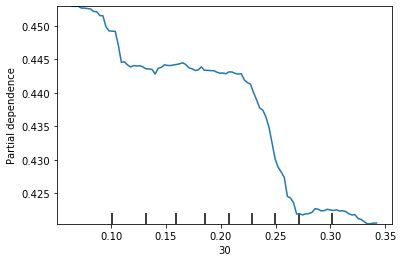

In [10]:
# partial dependency plot
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[0:1]), target=0)

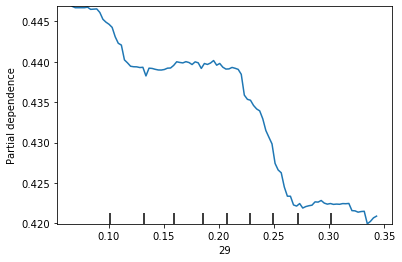

In [9]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[1:2]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[2:3]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[3:4]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[4:5]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[5:6]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[6:7]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[7:8]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[8:9]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[9:10]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[10:11]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[11:12]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[12:13]), target=0)

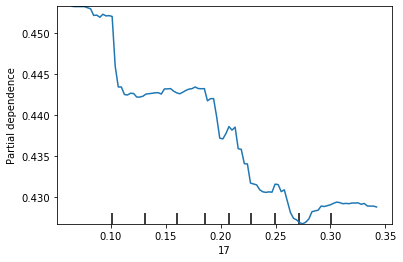

In [34]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[13:14]), target=0)

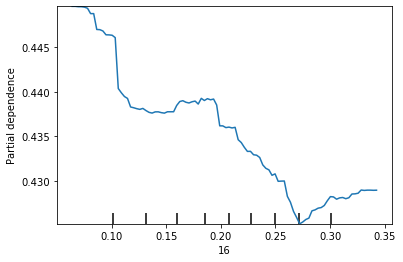

In [35]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[14:15]), target=0)

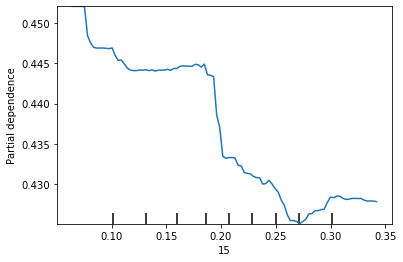

In [36]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[15:16]), target=0)

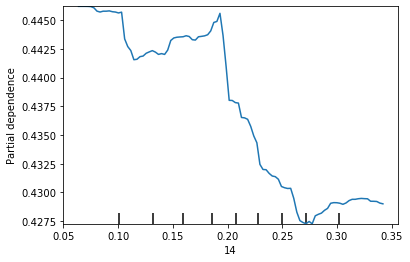

In [37]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[16:17]), target=0)

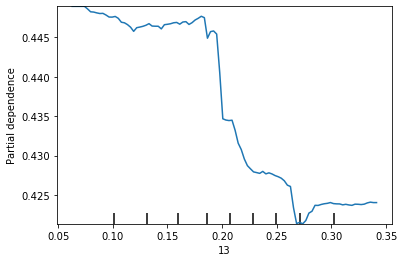

In [38]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[17:18]), target=0)

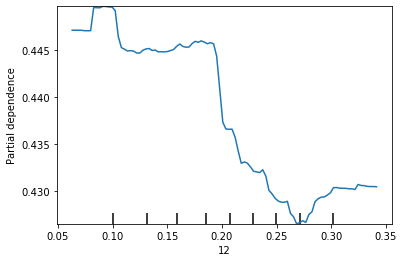

In [39]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[18:19]), target=0)

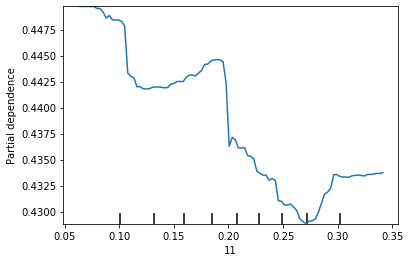

In [40]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[19:20]), target=0)

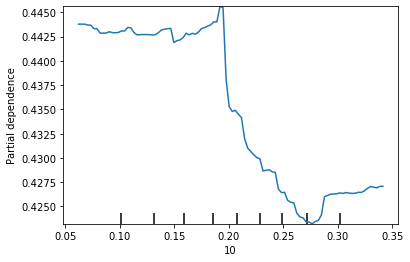

In [41]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[20:21]), target=0)

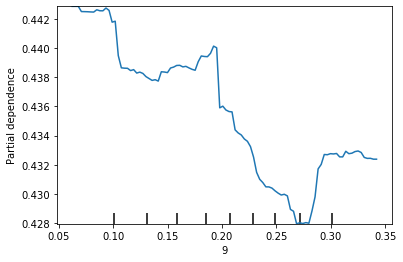

In [42]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[21:22]), target=0)

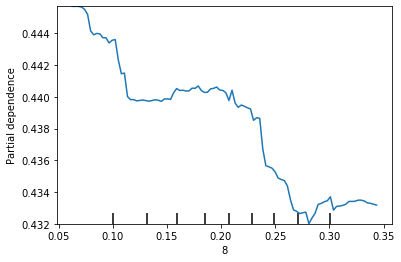

In [43]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[22:23]), target=0)

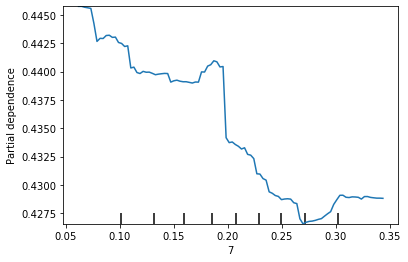

In [44]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[23:24]), target=0)

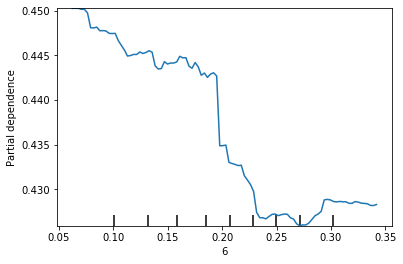

In [45]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[24:25]), target=0)

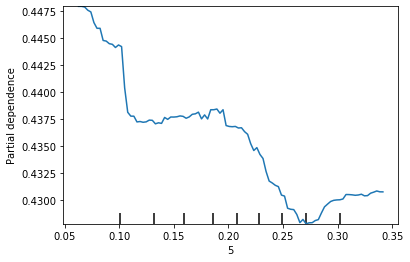

In [46]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[25:26]), target=0)

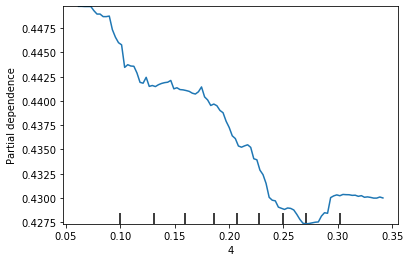

In [47]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[26:27]), target=0)

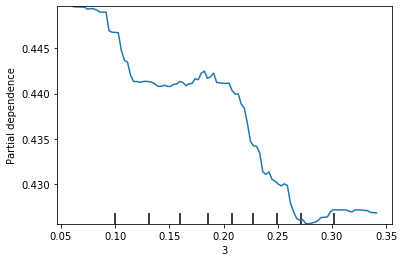

In [48]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[27:28]), target=0)

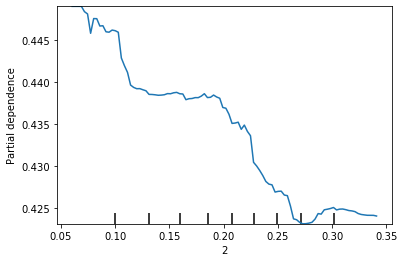

In [49]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[28:29]), target=0)

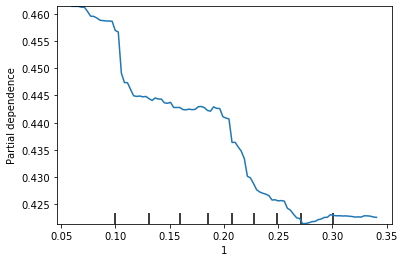

In [50]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[29:30]), target=0)

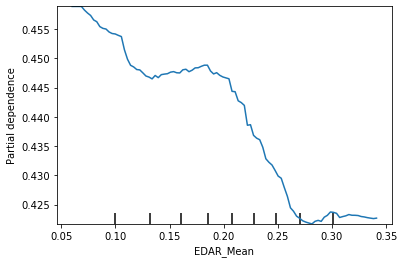

In [51]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[30:31]), target=0)

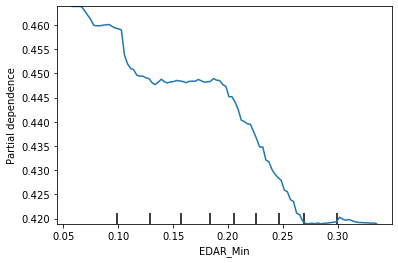

In [52]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[31:32]), target=0)

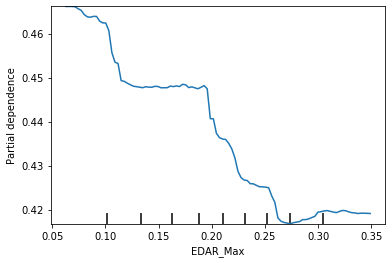

In [53]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[32:33]), target=0)

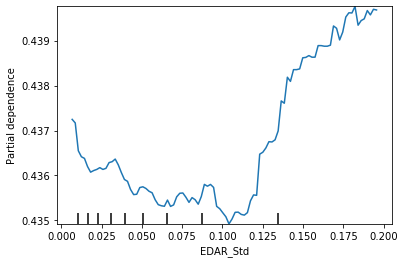

In [54]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[33:34]), target=0)

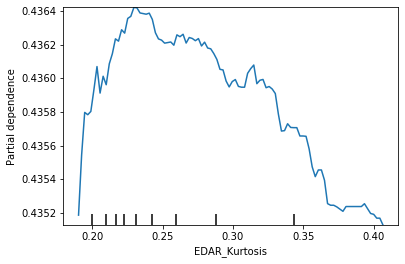

In [55]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[34:35]), target=0)

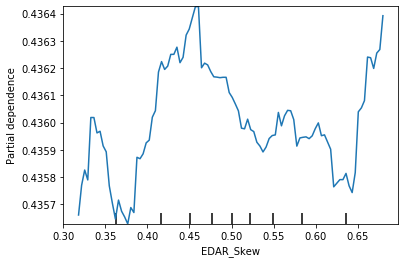

In [56]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[35:36]), target=0)

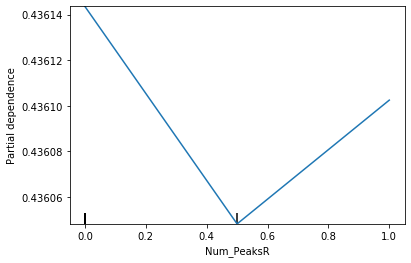

In [57]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[36:37]), target=0)

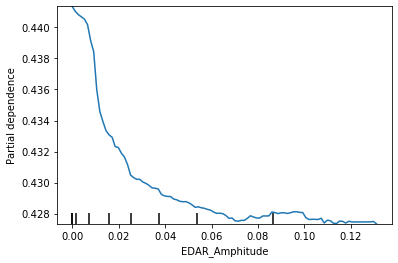

In [58]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[37:38]), target=0)

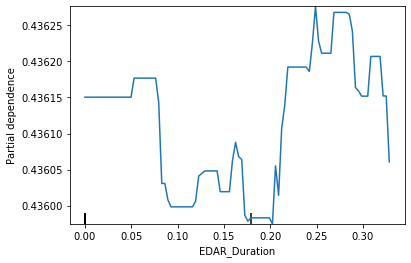

In [59]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[38:39]), target=0)

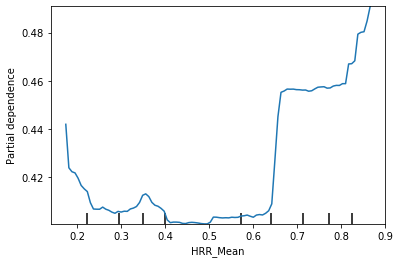

In [60]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[39:40]), target=0)

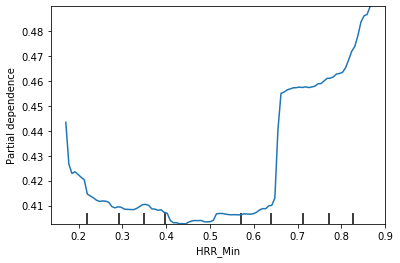

In [61]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[40:41]), target=0)

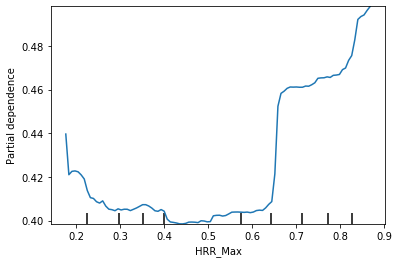

In [62]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[41:42]), target=0)

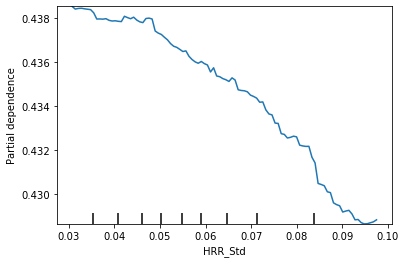

In [63]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[42:43]), target=0)

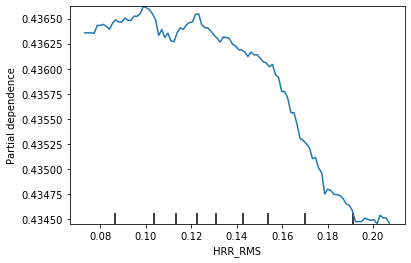

In [64]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[43:44]), target=0)

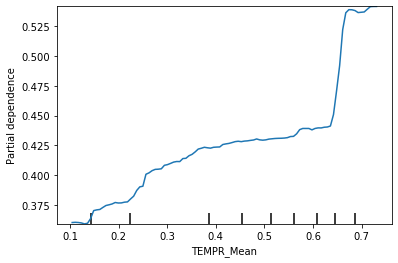

In [65]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[44:45]), target=0)

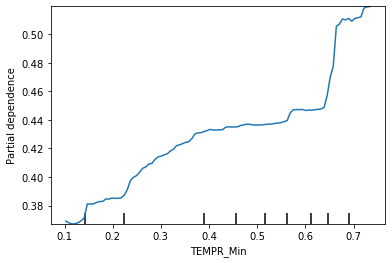

In [66]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[45:46]), target=0)

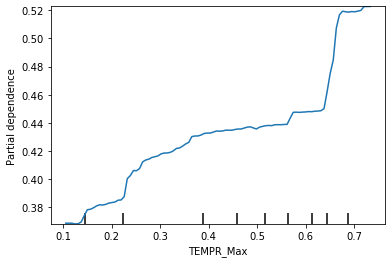

In [67]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[46:47]), target=0)

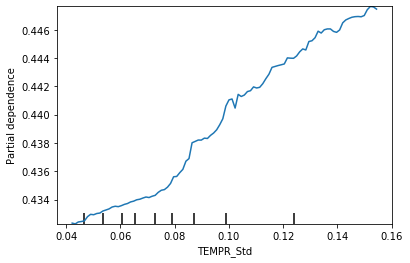

In [68]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[47:48]), target=0)